## Section 1

In [ ]:
# First we import the libraries we need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
breast_cancer_df = pd.read_csv('1-breast_cancer.csv')
feature_description = pd.read_excel('1-breast_cancer_Fatures.xlsx')

In [ ]:
breast_cancer_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
feature_description

,Column Name,Description
0,mean_radius,Mean value of the distance from the center to ...
1,mean_texture,Mean value of variation in grayscale levels (t...
2,mean_perimeter,Mean value of the tumor's perimeter.
3,mean_area,Mean area of the tumor.
4,mean_smoothness,Mean value of local variations in radius lengths.
5,diagnosis,"Diagnosis result: 0 = Benign, 1 = Malignant (c..."


### Question 1

In [ ]:
# calling needed libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
X = breast_cancer_df.drop(columns=['diagnosis'])
y = breast_cancer_df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# constructing the tree
clf = DecisionTreeClassifier(criterion='gini', min_samples_split=10, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10, random_state=42)

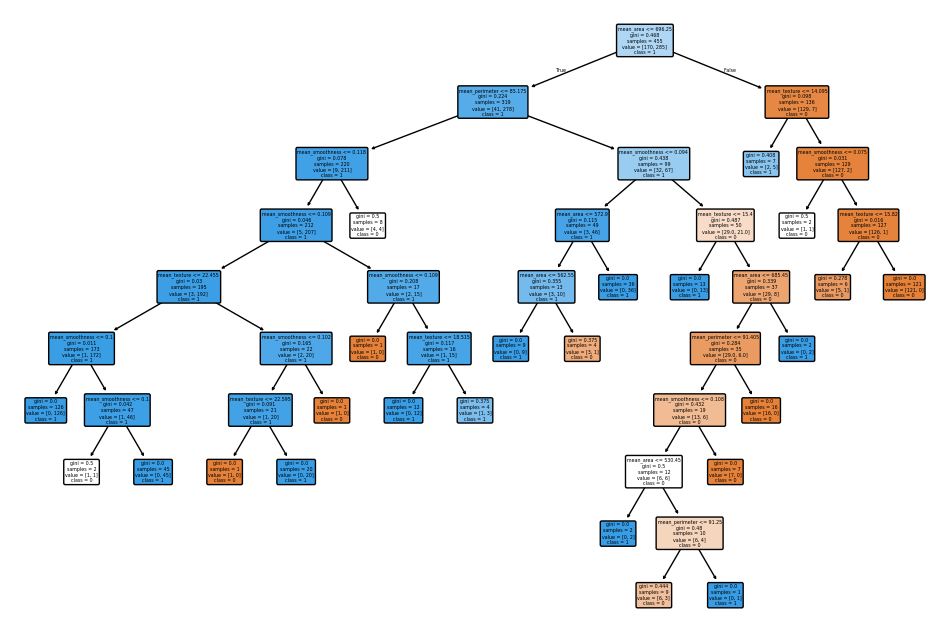

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['0','1'], filled=True, rounded=True)
plt.show()

In [ ]:
root_feature = X.columns[clf.tree_.feature[0]]
root_feature

'mean_area'

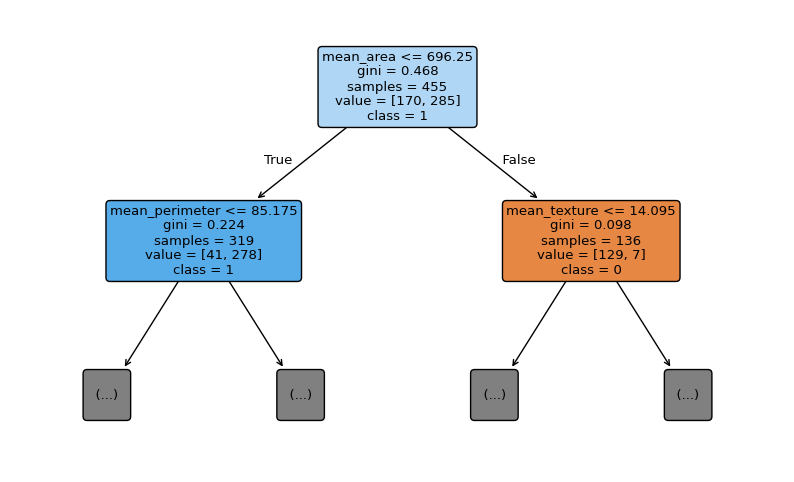

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=['0','1'], filled=True, rounded=True, max_depth=1)
plt.show()

### Question 2

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
depths = list(range(1, 11))
train_accuracies = []
test_accuracies = []

In [ ]:
# for each depthwe construct the model and save the accuracies.
for depth in depths:
    model = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

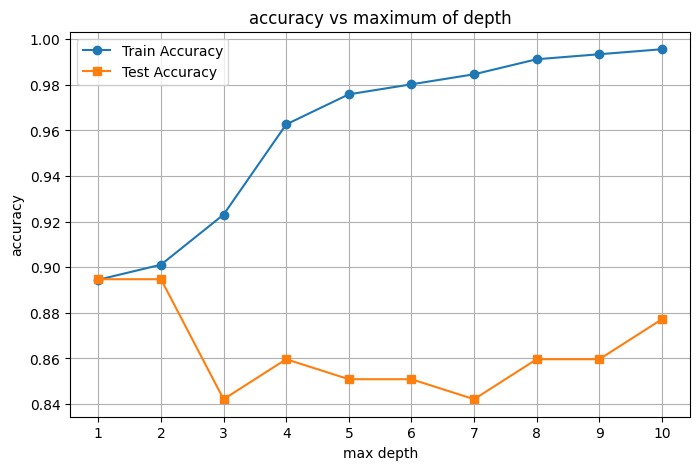

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(depths, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(depths, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.title("accuracy vs maximum of depth")
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
overfit_info = list(zip(depths, train_accuracies, test_accuracies))
overfit_info

[(1, 0.8945054945054945, 0.8947368421052632),
 (2, 0.9010989010989011, 0.8947368421052632),
 (3, 0.9230769230769231, 0.8421052631578947),
 (4, 0.9626373626373627, 0.8596491228070176),
 (5, 0.9758241758241758, 0.8508771929824561),
 (6, 0.9802197802197802, 0.8508771929824561),
 (7, 0.9846153846153847, 0.8421052631578947),
 (8, 0.9912087912087912, 0.8596491228070176),
 (9, 0.9934065934065934, 0.8596491228070176),
 (10, 0.9956043956043956, 0.8771929824561403)]

### Question 3

In [ ]:
# constructing tree based on entropy
clf_entropy = DecisionTreeClassifier(
    criterion='entropy',
    min_samples_split=10,
    random_state=42
)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10,
                       random_state=42)

In [ ]:
# getting the accuracy of the model with entropy
y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

In [ ]:
# getting the accuracy of the model with gini
y_pred_gini = clf.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

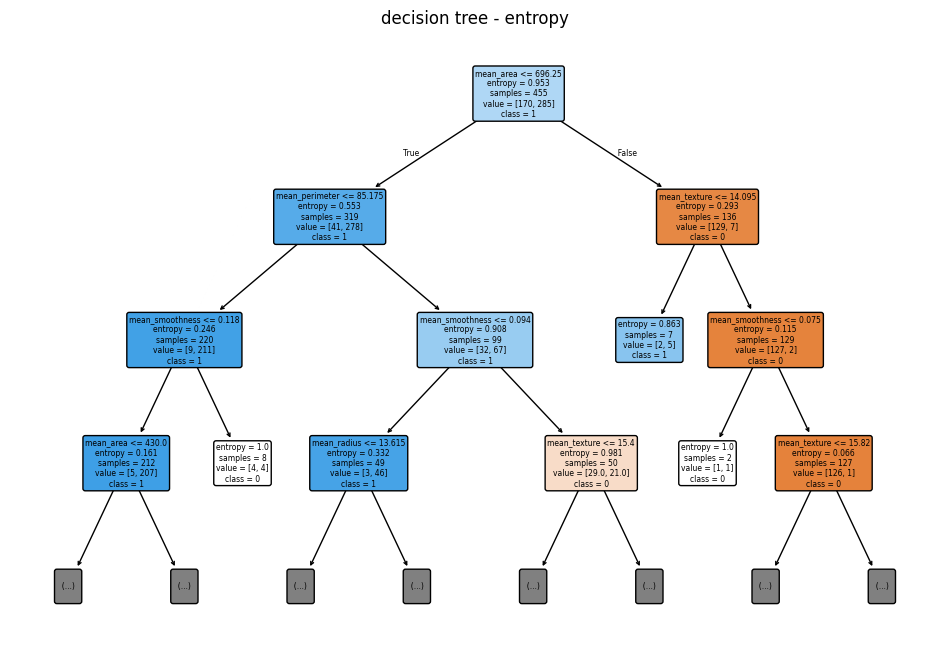

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, feature_names=X.columns, class_names=['0','1'], filled=True, rounded=True, max_depth=3)
plt.title("decision tree - entropy")
plt.show()

In [ ]:
# getting root features of the models
root_feature_entropy = X.columns[clf_entropy.tree_.feature[0]]
root_feature_gini = X.columns[clf.tree_.feature[0]]

In [ ]:
{
    "gini accuracy": accuracy_gini,
    "gini root feature": root_feature_gini,
    "entropy accuracy": accuracy_entropy,
    "entropy root feature": root_feature_entropy
}

{'gini accuracy': 0.8245614035087719,
 'gini root feature': 'mean_area',
 'entropy accuracy': 0.868421052631579,
 'entropy root feature': 'mean_area'}

### Question 4

In [ ]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)

In [ ]:
# constructing the optimal model.
best_model = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
# constructing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

In [ ]:
# calculating indexes.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred, zero_division=0)

In [ ]:
print("Confusion Matrix:", cm)
print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall (Sensitivity):", round(recall, 3))
print("Specificity:", round(specificity, 3))
print("F1 Score:", round(f1, 3))

Confusion Matrix: [[33  9]
 [ 3 69]]
Accuracy: 0.895
Precision: 0.885
Recall (Sensitivity): 0.958
Specificity: 0.786
F1 Score: 0.92


### Question 5

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)

In [ ]:
ccp_alphas = path.ccp_alphas[:-1]

In [ ]:
alpha_scores = []
alpha_models = []

for alpha in ccp_alphas:
    clf_alpha = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(clf_alpha, X_train, y_train, cv=5, scoring='accuracy')
    alpha_scores.append(scores.mean())
    alpha_models.append(clf_alpha)

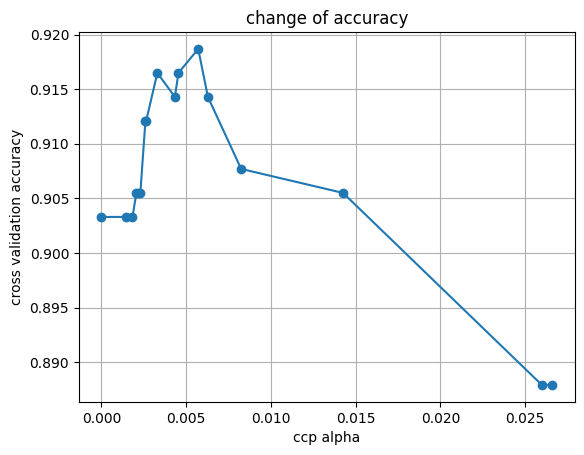

In [ ]:
plt.plot(ccp_alphas, alpha_scores, marker='o', linestyle='-')
plt.xlabel("ccp alpha")
plt.ylabel("cross validation accuracy")
plt.title("change of accuracy")
plt.grid(True)
plt.show()

In [ ]:
best_index = int(np.argmax(alpha_scores))
best_alpha = ccp_alphas[best_index]
print("best alpha:", best_alpha)
print("accuracy cross-validation:", alpha_scores[best_index])

best alpha: 0.005709194280622852
accuracy cross-validation: 0.9186813186813186


In [ ]:
pruned_model = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=best_alpha)
pruned_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.005709194280622852),
                       random_state=42)

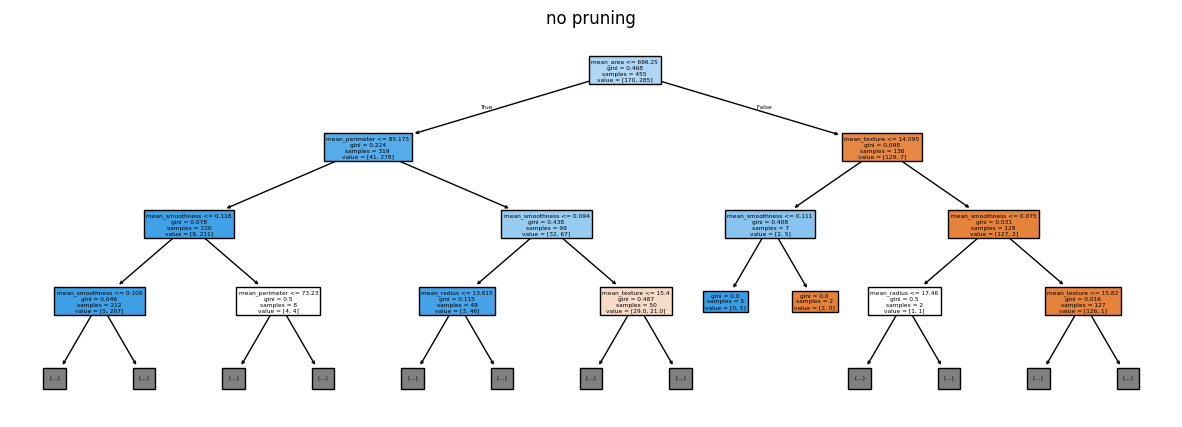

In [ ]:
plt.figure(figsize=(15, 5))
plot_tree(clf.fit(X_train, y_train), filled=True, max_depth=3, feature_names=X.columns)
plt.title("no pruning")
plt.show()

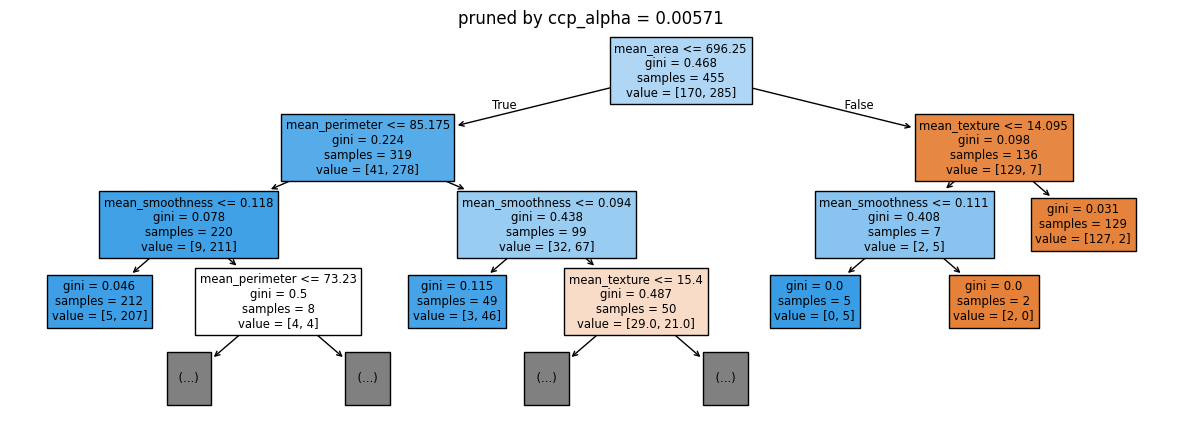

In [ ]:
plt.figure(figsize=(15, 5))
plot_tree(pruned_model, filled=True, max_depth=3, feature_names=X.columns)
plt.title("pruned by ccp_alpha = {}".format(round(best_alpha, 5)))
plt.show()

### Question 6

In [ ]:
importances = pruned_model.feature_importances_
features = X.columns

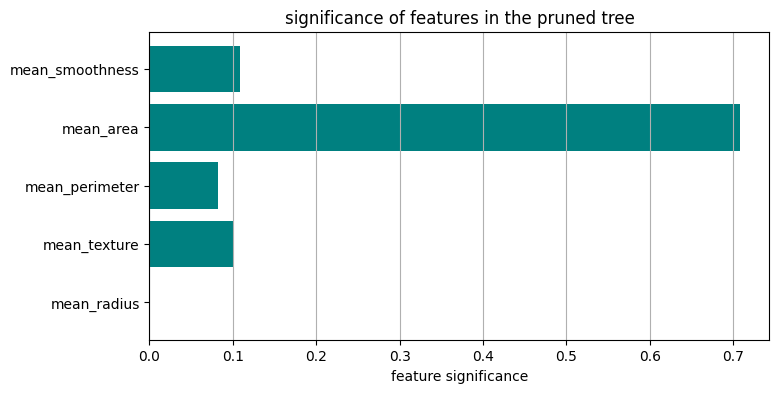

In [ ]:
plt.figure(figsize=(8, 4))
plt.barh(features, importances, color='teal')
plt.xlabel("feature significance")
plt.title("significance of features in the pruned tree")
plt.grid(axis='x')
plt.show()

In [ ]:
sorted_features = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
sorted_features

[('mean_area', np.float64(0.7080766450123053)),
 ('mean_smoothness', np.float64(0.10865824387713505)),
 ('mean_texture', np.float64(0.10107444722262633)),
 ('mean_perimeter', np.float64(0.08219066388793342)),
 ('mean_radius', np.float64(0.0))]

### Question 7

In [ ]:
threshold_model = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=best_alpha)
threshold_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.005709194280622852),
                       random_state=42)

In [ ]:
y_proba = threshold_model.predict_proba(X_test)[:, 1]

In [ ]:
thresholds = [0.3, 0.5, 0.7]
results = {}

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    tn, fp, fn, tp = cm.ravel()
    results[t] = {
        "False Positive": int(fp),
        "False Negative": int(fn)
    }

results

{0.3: {'False Positive': 3, 'False Negative': 13},
 0.5: {'False Positive': 3, 'False Negative': 13},
 0.7: {'False Positive': 3, 'False Negative': 13}}